In [1]:
using StochasticDiffEq, Plots, DiffEqDevTools, SDEProblemLibrary
import SDEProblemLibrary: prob_sde_additivesystem,
            prob_sde_additive, prob_sde_2Dlinear, prob_sde_linear, prob_sde_wave
const N = 20

20

┌ Info: Error calculation: 1/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 2/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 3/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 4/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 5/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 6/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 7/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 8/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:572
┌ Info: Error calculation: 9/20
└ @ DiffEqDevTools C:\Users\henh

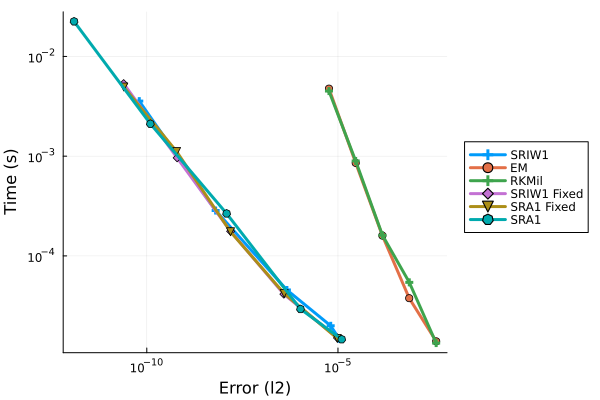

In [2]:
prob = prob_sde_additive
prob = remake(prob,tspan=(0.0,1.0))

reltols = 1.0 ./ 10.0 .^ (1:5)
abstols = reltols#[0.0 for i in eachindex(reltols)]

setups = [Dict(:alg=>SRIW1())
          Dict(:alg=>EM(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1))
          Dict(:alg=>RKMil(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)
          Dict(:alg=>SRIW1(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)
          Dict(:alg=>SRA1(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)
          Dict(:alg=>SRA1())
          ]
names = ["SRIW1","EM","RKMil","SRIW1 Fixed","SRA1 Fixed","SRA1"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;numruns=N,names=names,maxiters=1e7,error_estimate=:l2)
plot(wp)

In [5]:
using StochasticDiffEq, Plots, DiffEqDevTools

f_lin = function (du, u, p, t)
    du[1] = -0.5 * u[1]
end

g_lin = function (du, u, p, t)
    du[1] = im * u[1]
end

lin_analytic = function (u₀, p, t, Wt)
    u₀ .* exp.(im .* Wt)
end

tspan = (0.0, 10.0)
noise = StochasticDiffEq.RealWienerProcess!(0.0, Float64[0.0])
prob = SDEProblem(SDEFunction(f_lin, g_lin; analytic = lin_analytic),
    ComplexF64[1.0], tspan, noise = noise)

reltols = 1.0 ./ 10.0 .^ (1:5)
abstols = reltols#[0.0 for i in eachindex(reltols)]
setups = [Dict(:alg => EM(), :dts => 1.0 ./ 5.0 .^ ((1:length(reltols)) .+ 1)),
          Dict(:alg => RKMil(), :dts => 1.0 ./ 5.0 .^ ((1:length(reltols)) .+ 1),
              :adaptive => false),
          Dict(:alg => SRA1(), :dts => 1.0 ./ 5.0 .^ ((1:length(reltols)) .+ 1),
              :adaptive => false),
          Dict(:alg => SRA1())]
names = ["EM", "RKMil", "SRA1 Fixed", "SRA1"]
wp = WorkPrecisionSet(prob, abstols, reltols, setups; numruns = 10,
    names = names, maxiters = 1e7, error_estimate = :l2)

┌ Info: Error calculation: 1/20
└ @ DiffEqDevTools C:\Users\henhen724\.julia\packages\DiffEqDevTools\9OhJP\src\benchmark.jl:561


MethodError: MethodError: no method matching /(::Nothing, ::Float64)

Closest candidates are:
  /(!Matched::BigFloat, ::Union{Float16, Float32, Float64})
   @ Base mpfr.jl:506
  /(!Matched::Missing, ::Number)
   @ Base missing.jl:123
  /(!Matched::IdentityOperator, ::Number)
   @ SciMLOperators C:\Users\henhen724\.julia\packages\SciMLOperators\778OM\src\basic.jl:215
  ...


In [ ]:
using Test
plt = @test_nowarn plot(wp)
for i in 1:length(names)
    @test plt[1][i][:x] ≈ getproperty(wp[i].errors, wp[i].error_estimate)
    @test plt[1][i][:label] == names[i]
end

In [3]:
wp[1].errors

UndefVarError: UndefVarError: `wp` not defined

In [60]:
sol.errors

Dict{Symbol, Float64} with 3 entries:
  :l∞    => 0.288015
  :final => 0.0440711
  :l2    => 0.0464117

In [59]:
plot(wp)

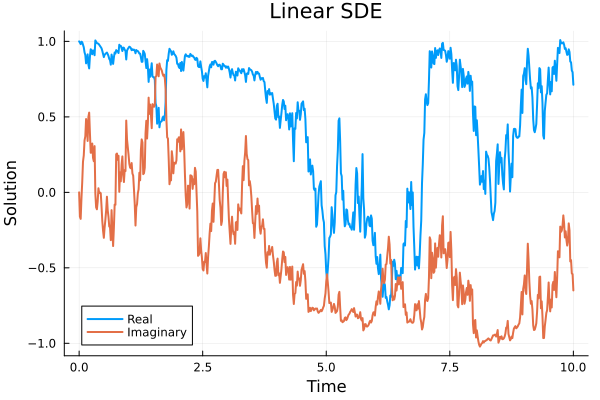

In [57]:
z = map(x->x[1], sol.u)
plot(sol.t, [real.(z) imag.(z)], title = "Linear SDE", label = ["Real" "Imaginary"], xlabel = "Time", ylabel = "Solution", lw = 2)

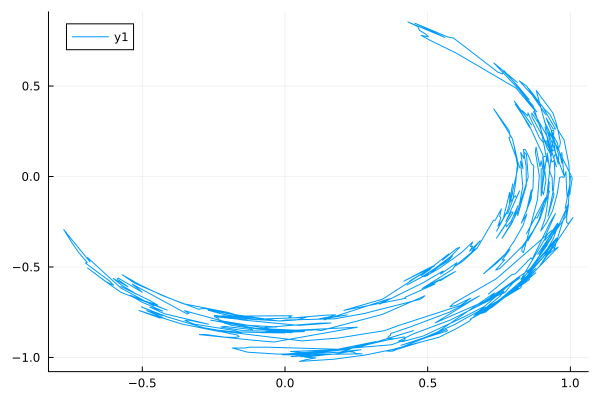

In [58]:
plot(real.(z), imag.(z))
# plot([real.(z)[begin]], [imag.(z)[begin]], color="red", label="Start")

In [29]:
wp[1]

Name: EM
Times: [0.0001216, 0.000183, 0.0002998]
Errors: @NamedTuple{l∞::ComplexF64, final::ComplexF64, l2::ComplexF64}[(l∞ = 3.76694755498776 + 0.0im, final = 0.843559328527492 + 0.0im, l2 = 1.0267265331322584 + 0.0im), (l∞ = 12.195667199814734 + 0.0im, final = 5.421589509858902 + 0.0im, l2 = 3.1472755430479276 + 0.0im), (l∞ = 17.156391608679524 + 0.0im, final = 12.98242585911242 + 0.0im, l2 = 3.3210104758206413 + 0.0im)]


In [1]:
using Plots, DiffEqDevTools
include("../HenryLib.jl")
prob, full_cb, tspan, out, CurrW = dicke_hetrodyne_atom_only_prob(;Nspin=10, κ=2π * 0.15, Δc=-2π * 80, ωz=2π * 0.01, λ0=3.0, t_ramp=200.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=1.0, recordtimes=1000, save_noise=true)

reltols = 1.0 ./ 10.0 .^ (1:3)
abstols = reltols#[0.0 for i in eachindex(reltols)]

setups = [Dict(:alg=>EM(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>false),
 Dict(:alg=>LambaEM(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>false),
 Dict(:alg=>EulerHeun(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>false),
 Dict(:alg=>LambaEulerHeun(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>false),
 Dict(:alg=>RKMilCommute(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>false),
 Dict(:alg=>RKMilGeneral(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>false)]
#  Dict(:alg=>WangLi3SMil_A(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false),
#  Dict(:alg=>WangLi3SMil_B(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false),
#  Dict(:alg=>WangLi3SMil_C(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false),
#  Dict(:alg=>WangLi3SMil_D(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false),
#  Dict(:alg=>WangLi3SMil_E(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false),
#  Dict(:alg=>WangLi3SMil_F(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)]

names = ["EM", "LambaEM", "EulerHeun", "LambaEulerHeun", "RKMilCommute", "RKMilGeneral"]#, "WangLi3SMil_A", "WangLi3SMil_B", "WangLi3SMil_C", "WangLi3SMil_D", "WangLi3SMil_E", "WangLi3SMil_F"]

wp = WorkPrecisionSet(prob,abstols,reltols,setups,1//2^(10);numruns=1, numruns_error=1, trajectories = 3,names=names,maxiters=1e7,error_estimate=:final,appxsol_setup=Dict(:alg=>RKMilGeneral(;ii_approx=IICommutative())))

┌ Info: Error calculation: 1/1
└ @ DiffEqDevTools C:\Users\henhen724\.julia\dev\DiffEqDevTools\src\benchmark.jl:573


false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false
false false


WorkPrecisionSet of 6 wps


In [12]:
wp[1].errors

3-element StructArray(::Vector{ComplexF64}) with eltype @NamedTuple{final::ComplexF64}:
 (final = 2.0195194528179605e-5 + 0.0im,)
 (final = 0.00010861980146818945 + 0.0im,)
 (final = 0.00017294032954200415 + 0.0im,)

In [13]:
wp.error_estimate

:final

In [20]:
import Base: isless
function Base.isless(a::Union{Complex, AbstractFloat}, b::Union{Complex, AbstractFloat})
    return Real(a) < Real(b)
end

In [23]:
wp[1].errors

3-element StructArray(::Vector{ComplexF64}) with eltype @NamedTuple{final::ComplexF64}:
 (final = 2.0195194528179605e-5 + 0.0im,)
 (final = 0.00010861980146818945 + 0.0im,)
 (final = 0.00017294032954200415 + 0.0im,)

In [21]:
plot(wp)

In [4]:
reltols = 1.0 ./ 10.0 .^ (1:3)
abstols = reltols#[0.0 for i in eachindex(reltols)]

setups = [Dict(:alg=>LambaEM(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>true),
 Dict(:alg=>LambaEulerHeun(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>true),
 Dict(:alg=>RKMilCommute(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>true),
 Dict(:alg=>RKMilGeneral(),:dts=>1.0./2.0.^((1:length(reltols)) .+ 3),:adaptive=>true)]

names = ["LambaEM", "LambaEulerHeun", "RKMilCommute", "RKMilGeneral"]

wp = WorkPrecisionSet(prob,abstols,reltols,setups,1//2^(11);numruns=20,names=names,maxiters=1e7,error_estimate=:l2,appxsol_setup=Dict(:alg=>RKMilGeneral(;ii_approx=IICommutative())))
plot(wp)

┌ Info: Error calculation: 1/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 2/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 3/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 4/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 5/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 6/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 7/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 8/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/DiffEqDevTools/src/benchmark.jl:562
┌ Info: Error calculation: 9/20
└ @ DiffEqDevTools /Users/henryhunt/.julia/dev/D

MethodError: MethodError: no method matching isless(::ComplexF64, ::ComplexF64)

Closest candidates are:
  isless(!Matched::Missing, ::Any)
   @ Base missing.jl:87
  isless(::Any, !Matched::Missing)
   @ Base missing.jl:88
  isless(::Number, !Matched::Discontinuity)
   @ DelayDiffEq ~/.julia/packages/DelayDiffEq/kNDLE/src/discontinuity_type.jl:26
  ...
